In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Loan Eligibility Prediction.csv')
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [3]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dtypes

Customer_ID             int64
Gender                 object
Married                object
Dependents              int64
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Loan_Amount_Term        int64
Credit_History          int64
Property_Area          object
Loan_Status            object
dtype: object

## EDA

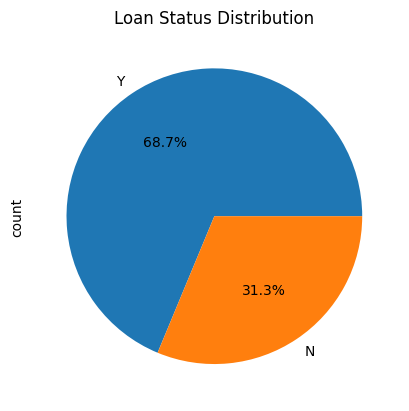

In [12]:
df['Loan_Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

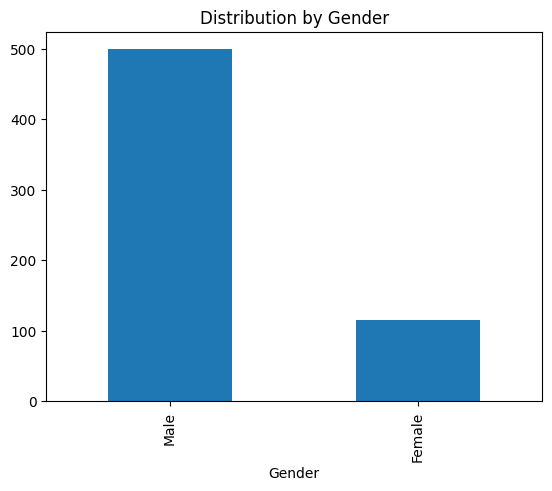

In [16]:
df['Gender'].value_counts().plot(kind='bar',title='Distribution by Gender')
plt.show()

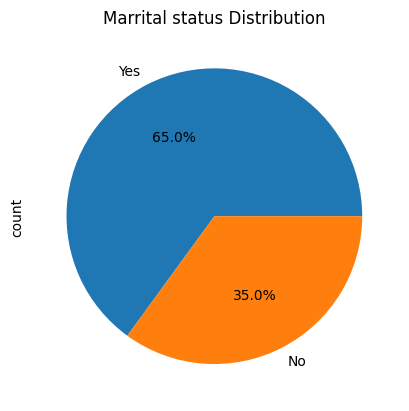

In [18]:
df['Married'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Marrital status Distribution')
plt.show()

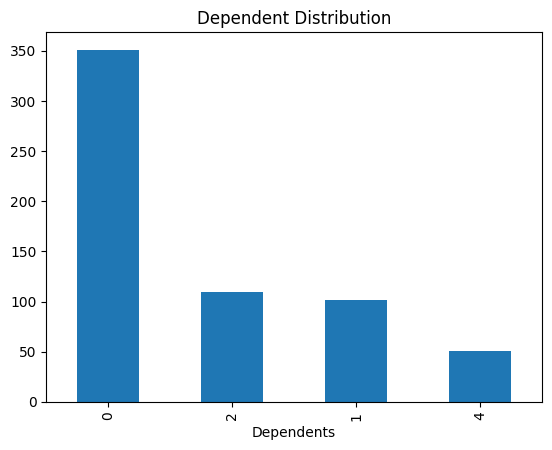

In [22]:
df['Dependents'].value_counts().plot(kind='bar')
plt.title('Dependent Distribution')
plt.show()

### Do longer loan terms correlate with higher approval rates?

In [29]:
pd.crosstab(df['Loan_Amount_Term'], 
            df['Loan_Status'], 
            normalize='index') * 100

Loan_Status,N,Y
Loan_Amount_Term,,
12,0.000000,100.000000
36,100.000000,0.000000
60,0.000000,100.000000
84,25.000000,75.000000
120,33.333333,66.666667
180,34.090909,65.909091
240,25.000000,75.000000
300,38.461538,61.538462
360,29.980658,70.019342


### is there a relationship between credit history and load status

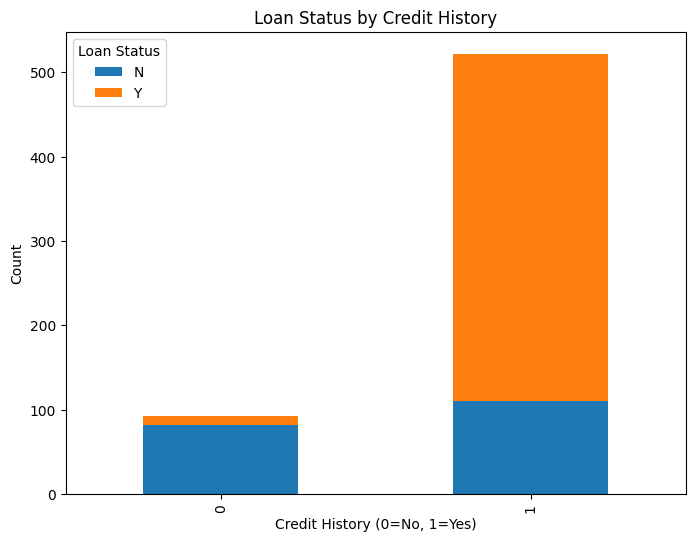

In [33]:
pd.crosstab(df['Credit_History'], 
            df['Loan_Status']).plot(kind='bar', 
                                           stacked=True,
                                           figsize=(8, 6))
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

loans of people with credit history tends to get approved more

### Is credit history the strongest predictor of loan approval?

In [39]:
# Convert categorical to numeric
loan_encoded = df.copy()
loan_encoded['Loan_Status_Numeric'] = loan_encoded['Loan_Status'].map({'Y': 1, 'N': 0})
loan_encoded['Gender_Numeric'] = loan_encoded['Gender'].map({'Male': 1, 'Female': 0})
loan_encoded['Married_Numeric'] = loan_encoded['Married'].map({'Yes': 1, 'No': 0})
loan_encoded['Education_Numeric'] = loan_encoded['Education'].map({'Graduate': 1, 'Not Graduate': 0})

# Calculate correlation with loan status
correlations = loan_encoded[['Credit_History', 'Gender_Numeric', 'Married_Numeric', 
                              'Education_Numeric', 'Applicant_Income', 
                              'Loan_Status_Numeric']].corr()['Loan_Status_Numeric'].sort_values(ascending=False)
print(correlations)

Loan_Status_Numeric    1.000000
Credit_History         0.523961
Married_Numeric        0.086673
Education_Numeric      0.085884
Gender_Numeric         0.009357
Applicant_Income      -0.004710
Name: Loan_Status_Numeric, dtype: float64


credit history is positively correlated with loan status